### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [283]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [284]:
data = pd.read_csv('data/coupons.csv')

In [285]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [286]:
print(data.shape)
print(data.dtypes)

(12684, 26)
destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
car                     object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
dtype: object


In [287]:
## Unique values per column — used to visualize problematic data.
# for column in data.columns:
#     print(f"\nColumna: {column}")
#     print(data[column].value_counts(dropna=False))

In [288]:
##### Problematic data adjustment #####

# Renaming values in the "age" column"
data['age'] = data['age'].replace({
                                'below21': 20,
                                '21': 21,
                                '26': 26,
                                '31': 31,
                                '36': 36,
                                '41': 41,
                                '46': 46,
                                '50plus': 50
                            }).astype(int)

# Renaming values in the "income column"
data['income'] = data['income'].replace({
                                        'Less than $12500': 12499,
                                        '$12500 - $24999': 12500,
                                        '$25000 - $37499': 25000,
                                        '$37500 - $49999': 37500,
                                        '$50000 - $62499': 50000,
                                        '$62500 - $74999': 62500,
                                        '$75000 - $87499': 75000,
                                        '$87500 - $99999': 87500,
                                        '$100000 or More': 100000
                                    }).astype(int)

# Renaming values for group of columns with ranges: 
    # Arbitrary values are chosen to represent each range 
cols_na_replace = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']


new_range_map = {'never': 0,    ## 0 because it represents never
                 'less1': 0.9,  ## 0.9 because it is a value less than one. ]0 , 1[
                 '1~3': 2,      ## 2 represents between 1 and 3, both included. [1 , 3]
                 '4~8': 6,      ## 6 represents between 4 and 8, both included. [4 , 8]
                 'gt8': 9}      ## 9 because it is a value greater than 8. ]8 , ∞[

range_cols = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']

for col in range_cols:
    data[col] = data[col].map(new_range_map)



In [289]:
## Valores únicos por columna --usado para comprobar que se cambió data problemática
# for column in data.columns:
#     print(f"\nColumna: {column}")
#     print(data[column].value_counts(dropna=False))


 Missing values per column:
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
dtype: int64

 % Missing values per column:
car                     99.148534
CoffeeHouse              1.710817
Restaurant20To50         1.490066
CarryAway                1.190476
RestaurantLessThan20     1.024913
Bar                      0.843582
dtype: float64


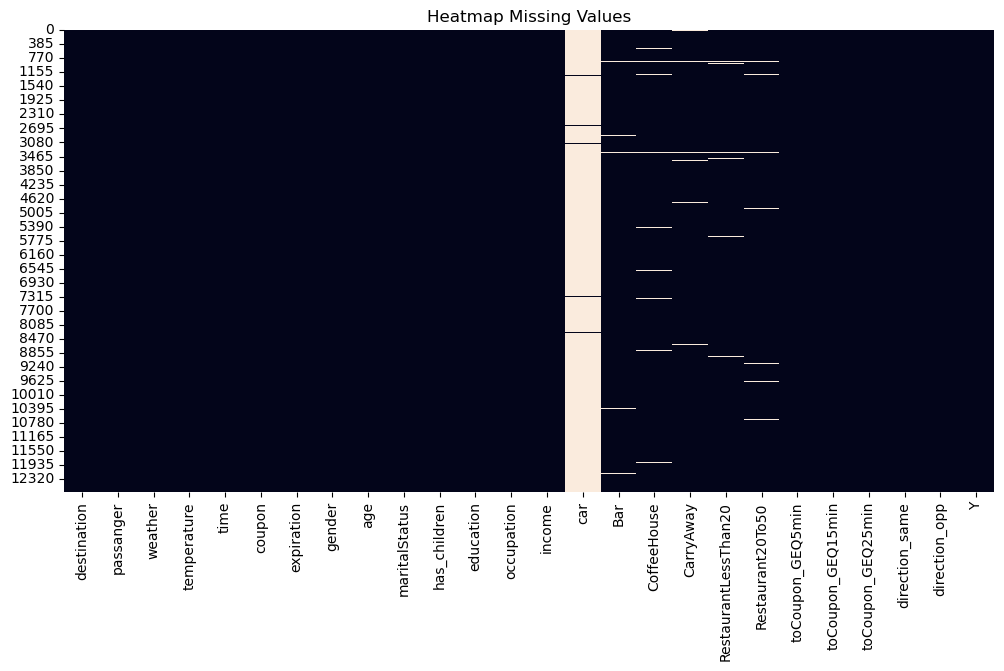

In [290]:
#####Searching for null values by column#####

## missing values per column: ##
#print(data.isnull().sum()) ## used for visualice all the columns with their missing values
nan_values = data.isnull().sum()

print("\n Missing values per column:")
print(nan_values[nan_values > 0])

## % missing values per column: ##
#print(nan_values/ len(data) * 100) ## used for visualice all the columns with their missing values %

# Missing values percentage
missing_percentage = (data.isnull().sum() / len(data)) * 100

missing_percentage = missing_percentage[missing_percentage > 0]

# Results
print("\n % Missing values per column:")
print(missing_percentage.sort_values(ascending=False))

# Missing values heatmap

plt.figure(figsize=(12,6))
sns.heatmap(data.isnull(), cbar=False)
plt.title("Heatmap Missing Values")
plt.show()


3. Decide what to do about your missing data -- drop, replace, other...

In [291]:
# Exploring NaN values per field along with their unique values.
null_col = []
for col in data.columns:
    if data[col].isnull().any():
        null_col.append(col)
for col in null_col:
    print(f"\nColumna: {col}")
    print(data[col].value_counts(dropna=False))


Columna: car
car
NaN                                         12576
Scooter and motorcycle                         22
Mazda5                                         22
do not drive                                   22
crossover                                      21
Car that is too old to install Onstar :D       21
Name: count, dtype: int64

Columna: Bar
Bar
0.0    5197
0.9    3482
2.0    2473
6.0    1076
9.0     349
NaN     107
Name: count, dtype: int64

Columna: CoffeeHouse
CoffeeHouse
0.9    3385
2.0    3225
0.0    2962
6.0    1784
9.0    1111
NaN     217
Name: count, dtype: int64

Columna: CarryAway
CarryAway
2.0    4672
6.0    4258
0.9    1856
9.0    1594
0.0     153
NaN     151
Name: count, dtype: int64

Columna: RestaurantLessThan20
RestaurantLessThan20
2.0    5376
6.0    3580
0.9    2093
9.0    1285
0.0     220
NaN     130
Name: count, dtype: int64

Columna: Restaurant20To50
Restaurant20To50
0.9    6077
2.0    3290
0.0    2136
6.0     728
9.0     264
NaN     189
Name: count, d

In [292]:
##### Processing null values by column #####

# Drop the 'car' column — this field has over 99% missing data.
data = data.drop(columns=['car'])

# The rest will be filled with value "0" (previously "never") since they represent less than 2% of the data, interpreted as "no action".
cols_na_replace = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
data[cols_na_replace] = data[cols_na_replace].fillna(0)

# Null check after cleanup
nan_values2 = data.isnull().sum()
print("\n Missing values per column:")
print(nan_values2[nan_values2 > 0])


 Missing values per column:
Series([], dtype: int64)


4. What proportion of the total observations chose to accept the coupon? 



In [293]:
# Since the "Y" field is binary (0 = 'does not want the coupon'; 1 = 'accepts the coupon'),
# the mean is used to obtain the acceptance proportion (%).

acceptance_rate = data['Y'].mean()
print(f"Proportion of total observation with accepted cupon: {acceptance_rate:.2%}")

Proportion of total observation with accepted cupon: 56.84%


5. Use a bar plot to visualize the `coupon` column.

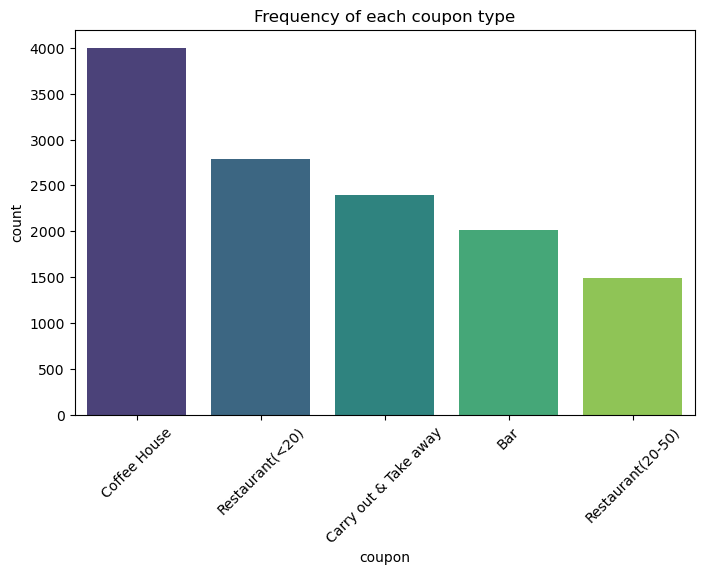

In [294]:
plt.figure(figsize = (8, 5) )
sns.countplot(data = data, x = 'coupon', order = data['coupon'].value_counts().index, palette='viridis')
plt.title('Frequency of each coupon type')
plt.xticks(rotation=45)
plt.show()

<span style="font-size:20px;"> The chart shows that the highest number of coupons corresponds to "Coffee House", followed by less expensive restaurants.</span> 

6. Use a histogram to visualize the temperature column.

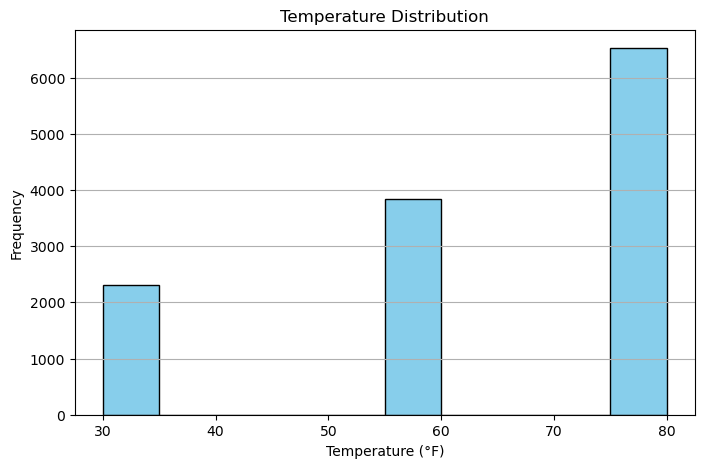

In [296]:
plt.figure(figsize=(8,5))
plt.hist(data['temperature'], bins=10, edgecolor='black', color='skyblue')

plt.title('Temperature Distribution')
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

<span style="font-size:20px;"> The most typical temperature values are between 50 and 80ºF.</span> 

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [298]:
bar_data = data[data['coupon'] == 'Bar']
bar_data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,37500,0.0,0.0,0.0,6.0,2.0,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,37500,0.0,0.0,0.0,6.0,2.0,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,37500,0.0,0.0,0.0,6.0,2.0,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,62500,0.0,0.9,6.0,6.0,0.9,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,62500,0.0,0.9,6.0,6.0,0.9,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,0,Bachelors degree,Sales & Related,75000,0.0,0.0,2.0,6.0,2.0,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,0,Bachelors degree,Sales & Related,75000,0.0,0.0,2.0,6.0,2.0,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,0,Bachelors degree,Sales & Related,75000,0.0,0.0,2.0,6.0,2.0,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,0,Bachelors degree,Sales & Related,75000,0.0,0.0,2.0,6.0,2.0,1,1,0,0,1,0


2. What proportion of bar coupons were accepted?


In [299]:
# Calculate the acceptance proportion
bar_acceptance_rate = bar_data['Y'].mean()
print(f"Proportion of bar observation with accepted cupon: {bar_acceptance_rate:.2%}")

Proportion of bar observation with accepted cupon: 41.00%


<span style="font-size:20px;"> It is concluded that **41%** of the total bar coupon observations **resulted in acceptance**.</span>

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [301]:
# Categorize between low and high frequency
low_freq = bar_data[bar_data['Bar'] <= 3]
high_freq = bar_data[bar_data['Bar'] > 3]


# Calculate acceptance rates
bar_low_freq_acceptance_rate = low_freq['Y'].mean()
bar_high_freq_acceptance_rate = high_freq['Y'].mean()

print(f"Proportion of bar observation with accepted cupon - 3 of fewer times: {bar_low_freq_acceptance_rate:.2%}")
print(f"Proportion of bar observation with accepted cupon - More than 3 times: {bar_high_freq_acceptance_rate:.2%}")

Proportion of bar observation with accepted cupon - 3 of fewer times: 37.07%
Proportion of bar observation with accepted cupon - More than 3 times: 76.88%


<span style="font-size:20px;"> It is also concluded that those who go to bars more than 3 times a month are much more likely to accept the coupon, with a **76.88% acceptance rate**, compared to those who visit bars 3 or fewer times per month, with a 37.07% rate.</span>

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [303]:
# Categorize
age_over_25 = bar_data['age'] > 25
more_than_once = bar_data['Bar'] > 1

# Auxiliary column for calculation
bar_data['group'] = more_than_once & age_over_25

# Calculate acceptance rates
acceptance_rates = bar_data.groupby('group')['Y'].mean() * 100

print(f"Proportion of bar observation with accepted coupon - More than once a month & +25 years old: {acceptance_rates[True]:.2f}%")
print(f"Proportion of bar observation with accepted coupon - All others: {acceptance_rates[False]:.2f}%")


Proportion of bar observation with accepted coupon - More than once a month & +25 years old: 69.52%
Proportion of bar observation with accepted coupon - All others: 33.50%


<span style="font-size:20px;"> It is concluded that those **over 25 years old** who go to a bar more than once a month are **more likely to accept the coupon**, with a **69.52% acceptance rate**, compared to the rest with a 33.50% rate. </span> 

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [305]:
# Categorize
p_not_kid = bar_data['passanger'] != 'Kid(s)'
w_not_farming = bar_data['occupation']!='Farming, Fishing & Forestry'

# Auxiliary column for calculation
bar_data['group2'] = p_not_kid & w_not_farming & more_than_once

# Calcular tasas de aceptación
acceptance_rates = bar_data.groupby('group2')['Y'].mean()

# Calculate acceptance rates
acceptance_rates2 = acceptance_rates * 100
print(f"Proportion of bar observation with accepted coupon - not_kid & not_farming & more_than_once: {acceptance_rates2[True]:.2f}%")
print(f"Proportion of bar observation with accepted coupon - All others: {acceptance_rates2[False]:.2f}%")

Proportion of bar observation with accepted coupon - not_kid & not_farming & more_than_once: 71.32%
Proportion of bar observation with accepted coupon - All others: 29.60%


<span style="font-size:20px;"> It is concluded that individuals with occupations other than agriculture, fishing, or forestry, 
who are **not traveling with children and go to bars more than once a month, are more likely to accept the coupon,** 
with a **71.32%** acceptance rate **compared to 29.60%** for the rest. </span>

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [307]:
# Categorize
m_not_widowed = bar_data['maritalStatus'] != 'Widowed'
age_under_30 = bar_data['age'] < 30 
cheap_over_4_times = bar_data['RestaurantLessThan20'] > 4
income_less_50k = bar_data['income'] < 50000

# Conditions: variable groups
cond1 = more_than_once & p_not_kid & m_not_widowed
cond2 = more_than_once & age_under_30
cond3 = cheapR_over_4_times & income_less_50k

bar_data['group3_1'] = cond1
bar_data['group3_2'] = cond2
bar_data['group3_3'] = cond3

# Calculate acceptance rates
acceptance_rates3_1 = bar_data.groupby('group3_1')['Y'].mean() * 100
acceptance_rates3_2 = bar_data.groupby('group3_2')['Y'].mean() * 100
acceptance_rates3_3 = bar_data.groupby('group3_3')['Y'].mean() * 100

# Conditions: True
print("Conditions: True")
print(f"Proportion of bar observation with accepted coupon - condition 1: {acceptance_rates3_1[True]:.2f}%")
print(f"Proportion of bar observation with accepted coupon - condition 2: {acceptance_rates3_2[True]:.2f}%")
print(f"Proportion of bar observation with accepted coupon - condition 3: {acceptance_rates3_3[True]:.2f}%")

# Conditions: False
print("\nConditions: False")
print(f"Proportion of bar observation with accepted coupon - not condition 1: {acceptance_rates3_1[False]:.2f}%")
print(f"Proportion of bar observation with accepted coupon - not condition 2: {acceptance_rates3_2[False]:.2f}%")
print(f"Proportion of bar observation with accepted coupon - not condition 3: {acceptance_rates3_3[False]:.2f}%")

Conditions: True
Proportion of bar observation with accepted coupon - condition 1: 71.32%
Proportion of bar observation with accepted coupon - condition 2: 72.17%
Proportion of bar observation with accepted coupon - condition 3: 45.35%

Conditions: False
Proportion of bar observation with accepted coupon - not condition 1: 29.60%
Proportion of bar observation with accepted coupon - not condition 2: 34.57%
Proportion of bar observation with accepted coupon - not condition 3: 40.11%


In [315]:
### Calculating another acceptance rates for conclutions ###

# Categorize
m_widowed = bar_data['maritalStatus'] == 'Widowed'

cond1_1_1 = p_not_kid & m_not_widowed
cond1_1_2 = p_not_kid & m_widowed


# Calculate acceptance rates
acceptance_rates3_1_1 = bar_data.groupby(cond1_1_1)['Y'].mean() * 100
acceptance_rates3_1_2= bar_data.groupby(cond1_1_2)['Y'].mean() * 100

# Conditions: True
print("Conditions: True")
print(f"Proportion of bar observation with accepted coupon - condition 1_1_1: {acceptance_rates3_1_1[True]:.2f}%")
print(f"Proportion of bar observation with accepted coupon - condition 1_1_2: {acceptance_rates3_1_2[True]:.2f}%")

# Conditions: False
print("\nConditions: False")
print(f"Proportion of bar observation with accepted coupon - not condition 1_1_1: {acceptance_rates3_1_2[False]:.2f}%")
print(f"Proportion of bar observation with accepted coupon - not condition 1_1_2: {acceptance_rates3_1_2[False]:.2f}%")

Conditions: True
Proportion of bar observation with accepted coupon - condition 1_1_1: 43.41%
Proportion of bar observation with accepted coupon - condition 1_1_2: 33.33%

Conditions: False
Proportion of bar observation with accepted coupon - not condition 1_1_1: 41.08%
Proportion of bar observation with accepted coupon - not condition 1_1_2: 41.08%


<span style="font-size:20px;"> It is concluded that individuals with **more social activity** (e.g., going to bars more than once a month), **who are not traveling with children**, are not widowed (i.e., have a partner), **and/or are between 25 and 30 years old, are more likely to accept the coupon**, with an acceptance rate between 71.32% and 72.17%, compared to other individuals. </span> 

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

<span style="font-size:25px;"> <u># Hypothesis </u> </span> 

<span style="font-size:20px;"> Drivers who accept bar coupons tend to have an **active social profile** (attending bars more frequently), **lack family-related restrictions** (such as having children or being widowed), **fall within the young adult age range** (between 25 and 30 years old) and have a low to medium income level. 
**Coupon acceptance behavior** improves significantly when these factors are combined, suggesting that affinity with the offer (bars) is influenced by both **consumption habits and personal availability as well as social context**. </span>




### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [311]:
# 'Coffee House' coupon data
coffee_df = data[data['coupon'] == 'Coffee House'].copy()

# Acceptance rate by type of companion
accept_by_passenger = coffee_df.groupby('passanger')['Y'].mean() * 100

# Acceptance rate by visit frequency
accept_by_freq = coffee_df.groupby('CoffeeHouse')['Y'].mean() * 100

# Acceptance rate by age
accept_by_age = coffee_df.groupby('age')['Y'].mean() * 100

# Acceptance rate by income
accept_by_income = coffee_df.groupby('income')['Y'].mean() * 100

# Display results as percentages
print("Tasa de aceptación por tipo de acompañante:")
print(accept_by_passenger)

print("\nTasa de aceptación por frecuencia de Coffee House:")
print(accept_by_freq)

print("\nTasa de aceptación por edad:")
print(accept_by_age)

print("\nAccept Tasa de aceptación por income:")
print(accept_by_income)

Tasa de aceptación por tipo de acompañante:
passanger
Alone        43.794326
Friend(s)    59.690554
Kid(s)       48.309179
Partner      57.049180
Name: Y, dtype: float64

Tasa de aceptación por frecuencia de Coffee House:
CoffeeHouse
0.0    20.820821
0.9    48.186047
2.0    64.779271
6.0    68.587361
9.0    65.789474
Name: Y, dtype: float64

Tasa de aceptación por edad:
age
20    69.677419
21    52.434881
26    51.482800
31    47.672552
36    46.766169
41    50.153846
46    51.363636
50    42.018349
Name: Y, dtype: float64

Accept Tasa de aceptación por income:
income
12499     55.194805
12500     54.040404
25000     47.343750
37500     54.237288
50000     50.364964
62500     43.636364
75000     29.661017
87500     55.719557
100000    49.438202
Name: Y, dtype: float64


<span style="font-size:25px;"> <u># Hypothesis </u> </span> 

<span style="font-size:20px;"> Drivers who frequently go to coffee shops and have an **active social life** (traveling with friends and partners) are the ones most likely to exhibit coupon acceptance behavior for "Coffee House".</span> 
